### Part 1

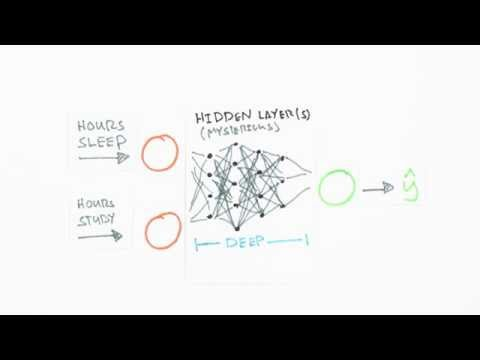

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('bxe2T-V8XRs')

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [91]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([0.75], [0.82], [0.93]), dtype=float)

print X.shape, y.shape

(3, 2) (3, 1)


### PART 2 - Forward Propagation

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# https://www.youtube.com/watch?v=UJwK6jAStmg
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
    
    def sigmoid(self, z):
        # apply sigmoid activation function
        return 1/(1+np.exp(-z))
    
#     def sigmoid(x):
#         a = []
#         for item in x:
#             a.append(1/(1+math.exp(-item)))
#         return a

    


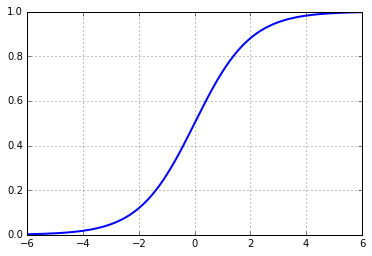

In [93]:
testInput = np.arange(-6, 6, 0.01)
plt.plot(testInput, sigmoid(testInput), linewidth=2)
grid(1)


In [94]:
sigmoid(np.random.randn(3,3))

array([[ 0.84340671,  0.46627037,  0.82556936],
       [ 0.71944502,  0.07527643,  0.43505246],
       [ 0.64872552,  0.46378964,  0.60901274]])

In [95]:
# PART 3 - Gradient Descent https://www.youtube.com/watch?v=5u0jaA3qAGk
# need to quantify how bad our predictions are with cost function

NN = Neural_Network()
print NN.W1

[[-0.39411724 -0.54123548  2.0596294 ]
 [ 0.97541885  0.05361066 -1.61449976]]


In [96]:
yHat = NN.forward(X)
print yHat
print yHat.shape

[[ 0.1966733 ]
 [ 0.80702831]
 [ 0.84622629]]
(3, 1)


In [97]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

### PART 3 - Gradient Descent

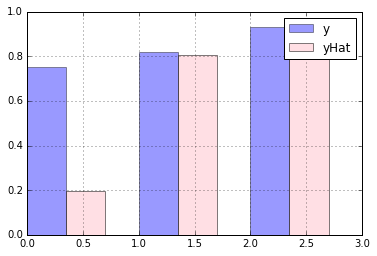

In [104]:

#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y, width = 0.35, alpha=0.4)
plt.bar([0.35,1.35,2.35],yHat, width = 0.35, color='pink', alpha=0.5)
grid(1)
legend(['y', 'yHat'])

Next step is to apply a cost function to see how inaccurate our predictions were.
--> curse of dimensionality

In [107]:
import time

weightsToTry = np.linspace(-5, 5, 1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)

endTime = time.clock()

In [108]:
timeElapsed = endTime-startTime
timeElapsed

0.03275599999999912